### Import Library

In [8]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [9]:
tuning = pd.read_csv('hasiltuning/hasiltuning.csv')
tuning

,hidden_layer,hidden_neuron,aktivasi,lr,epoch,mse,bobot,bias,bobot_output,bias_output
0,1,"(2,)",relu,0.0001,100,0.333144,"[[[np.float64(-0.2615389388779243), np.float64...","[[0.4819073277018717, np.float64(-0.4078395782...","[np.float64(0.7218100617465232), np.float64(0....",0.912953
1,1,"(2,)",relu,0.0001,200,0.053949,"[[[np.float64(-0.2501732285609381), np.float64...","[[0.17813843884859526, np.float64(0.0479741466...","[np.float64(0.8038067437414513), np.float64(0....",0.338951
2,1,"(2,)",relu,0.0010,100,0.030114,"[[[np.float64(0.03933148416250525), np.float64...","[[0.35871136865645037, np.float64(0.0550174572...","[np.float64(0.1476301574847731), np.float64(0....",0.233571
3,1,"(2,)",relu,0.0010,200,0.059167,"[[[np.float64(1.5635061201660234), np.float64(...","[[0.9714153457557431, np.float64(-0.7637374833...","[np.float64(0.042486258933588976), np.float64(...",0.447467
4,1,"(2,)",sigmoid,0.0001,100,0.127806,"[[[np.float64(0.7481538771091769), np.float64(...","[[0.704032234424797, np.float64(0.847560919471...","[np.float64(0.8123215377559434), np.float64(0....",0.186359
...,...,...,...,...,...,...,...,...,...,...
139,2,"(4, 4)",sigmoid,0.0010,200,0.089529,"[[[np.float64(0.9647168473564773), np.float64(...","[[0.6810490870334727, 0.1348509425212997, 0.99...","[np.float64(0.8510624303887415), np.float64(0....",0.367540
140,2,"(4, 4)",tanh,0.0001,100,0.093677,"[[[np.float64(0.5937046811571053), np.float64(...","[[0.09453540744865374, 0.5176956229730367, 0.8...","[np.float64(0.5004284823157761), np.float64(0....",0.860817
141,2,"(4, 4)",tanh,0.0001,200,0.111821,"[[[np.float64(0.3521004902648738), np.float64(...","[[0.7317163383270959, 0.6289608980908094, 0.17...","[np.float64(0.501054321510095), np.float64(0.3...",0.902410
142,2,"(4, 4)",tanh,0.0010,100,0.068502,"[[[np.float64(0.46661541025906084), np.float64...","[[0.5835365598325378, 0.8146677559114011, 0.81...","[np.float64(0.35293314379888385), np.float64(0...",0.436167


In [10]:
X_test = pd.read_csv('dataset/X_test.csv').values
X_test

array([[0.71310764, 0.85910339, 0.86342593, 0.61474395],
       [0.56076389, 0.40896615, 0.53240741, 0.40326393],
       [0.21440972, 0.        , 0.        , 0.        ],
       ...,
       [0.77690972, 0.83989021, 0.86805556, 0.80652786],
       [0.36935764, 0.17657823, 0.81481481, 0.61598199],
       [0.52256944, 0.13357731, 0.64583333, 0.41238042]])

In [11]:
y_test = pd.read_csv('dataset/y_test.csv').values
y_test

array([[0.80190822],
       [0.48023626],
       [0.        ],
       [0.        ],
       [0.36165379],
       [0.86687869],
       [0.45297592],
       [0.24125398],
       [0.42117219],
       [0.2380736 ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.68696047],
       [0.42071786],
       [0.00999546],
       [0.2916856 ],
       [0.        ],
       [0.98773285],
       [0.66288051],
       [0.41344843],
       [0.45797365],
       [0.44934121],
       [0.5483871 ],
       [0.27169468],
       [0.56519764],
       [0.31213085],
       [0.2753294 ],
       [0.53112222],
       [0.04588823],
       [0.16083598],
       [0.65879146],
       [0.17764652],
       [0.74193548],
       [0.82189914],
       [1.        ],
       [0.33666515],
       [0.30168105],
       [0.44979555],
       [0.41163108],
       [0.17673785],
       [0.5297592 ],
       [0.08178101],
       [0.79236711],
       [0.67605634],
       [0.44616084],
       [0.23171286],
       [0.768

##### Fungsi aktivasi

In [12]:
def aktivasiX(activ, x): 
    # aktivasi relu
    if activ == 'relu':
        if x >= 0:
            return x
        else:
            return 0
    # aktivasi sigmoid
    elif activ == 'sigmoid':
        return 1 / (1 + math.exp(-x))
    # aktivasi softmax
    elif activ == 'softmax':
        return 1
    # aktivasi tanh
    else:
        return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def turunanaktivasiX(activ, x): 
    # turunan aktivasi relu
    if activ == 'relu':
        if x > 0:
            return 1
        else:
            return 0
    # turunan aktivasi sigmoid
    elif activ == 'sigmoid':
        sig = 1 / (1 + math.exp(-x))
        return sig * (1 - sig)
    # turunan aktivasi softmax
    elif activ == 'softmax':
        return 0
    # turunan aktivasi tanh
    else:
        tan = (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
        return 1 - (tan) ** 2

##### Best parameter

In [13]:
best_index = tuning['mse'].idxmin()
best_hidden_layer_global = tuning['hidden_layer'][best_index]
best_hidden_neuron_global = tuning['hidden_neuron'][best_index]
best_aktivasi_global = tuning['aktivasi'][best_index]
best_lr_global = tuning['lr'][best_index]
best_epoch_global = tuning['epoch'][best_index]
best_mse_global = tuning['mse'][best_index]
best_bobot_global = tuning['bobot'][best_index]
best_bias_global = tuning['bias'][best_index]
best_bobot_output_global = tuning['bobot_output'][best_index]
best_bias_output_global = tuning['bias_output'][best_index]

print("Best Index:", best_index)
print("Best Hidden Layer:", best_hidden_layer_global)
print("Best Hidden Neuron:", best_hidden_neuron_global)
print("Best Aktivasi:", best_aktivasi_global)
print("Best Learning Rate:", best_lr_global)
print("Best Epoch:", best_epoch_global)
print("Best MSE:", best_mse_global)
print("Best Bobot:", best_bobot_global)
print("Best Bias:", best_bias_global)
print("Best Bobot Output:", best_bobot_output_global)
print("Best Bias Output:", best_bias_output_global)

Best Index: 121
Best Hidden Layer: 2
Best Hidden Neuron: (4, 3)
Best Aktivasi: relu
Best Learning Rate: 0.0001
Best Epoch: 200
Best MSE: 0.0202927405962552
Best Bobot: [[[np.float64(0.6947982210354825), np.float64(0.5674789300596899), np.float64(0.6670230161646279), np.float64(0.693549573307115)], [np.float64(0.5492374963728203), np.float64(0.44936958257184456), np.float64(0.8609743208453873), np.float64(0.25088842907928266)], [np.float64(0.48734010612780326), np.float64(0.04579957582345762), np.float64(0.7803288535585265), np.float64(0.07621100620257724)], [np.float64(0.5244116346551543), np.float64(0.9520032886495706), np.float64(0.2811804496244311), np.float64(0.2565377994467847)]], [[np.float64(0.5863086372349364), np.float64(-0.9174874636092839), np.float64(0.737930107410976)], [np.float64(0.763637216636695), np.float64(-1.349789862088427), np.float64(0.6174289568872192)], [np.float64(0.5443636893338604), np.float64(-0.6932188671850967), np.float64(1.0154775872980624)], [np.float6

##### Mengembalikan menjadi list

In [14]:
best_bobot_global = eval(best_bobot_global)
best_bias_global = eval(best_bias_global)
best_bobot_output_global = eval(best_bobot_output_global)

### Prediksi X_test

##### Fungsi prediksi X_test

In [15]:
def predict(X_test, y_test, bobot, bias, bobot_output, bias_output, aktivasi):
    prediksi = []
    error = []
    aktual = []
    for i in range(len(X_test)):
        # FEEDFORWARD
        # Operasi pada Hidden Layer
        aktivasi_hidden = []
        for j in range(len(bobot)):  # untuk setiap hidden layer
            aktivasi_hidden_temp = []
            for k in range(len(bobot[j][0])):  # jumlah neuron di hidden layer
                sumXbobot = 0
                if j == 0:  # layer pertama
                    for l in range(4):  # jumlah neuron input
                        sumXbobot += bobot[j][l][k] * X_test[i][l]
                else:
                    for l in range(len(aktivasi_hidden[j - 1])):
                        sumXbobot += bobot[j][l][k] * aktivasi_hidden[j - 1][l]
                sumXbobotbias = bias[j][k] + sumXbobot
                aktivasi_hidden_temp.append(aktivasiX(aktivasi, sumXbobotbias))
            aktivasi_hidden.append(aktivasi_hidden_temp)

        # Operasi pada Output Layer
        sumZbobotoutput = 0
        for j in range(len(aktivasi_hidden[-1])):
            sumZbobotoutput += bobot_output[j] * aktivasi_hidden[-1][j]
        sumZbobotoutput_biasoutput = bias_output + sumZbobotoutput
        predik = aktivasiX(aktivasi, sumZbobotoutput_biasoutput)
        prediksi.append(predik)
        error.append(abs(y_test[i][0] - predik))

    return prediksi, error

##### Pemanggilan fungsi prediksi

In [16]:
prediksi, error = predict(X_test, y_test, best_bobot_global, best_bias_global, best_bobot_output_global, best_bias_output_global, best_aktivasi_global)

##### Visualisasi hasil prediksi dan aktual

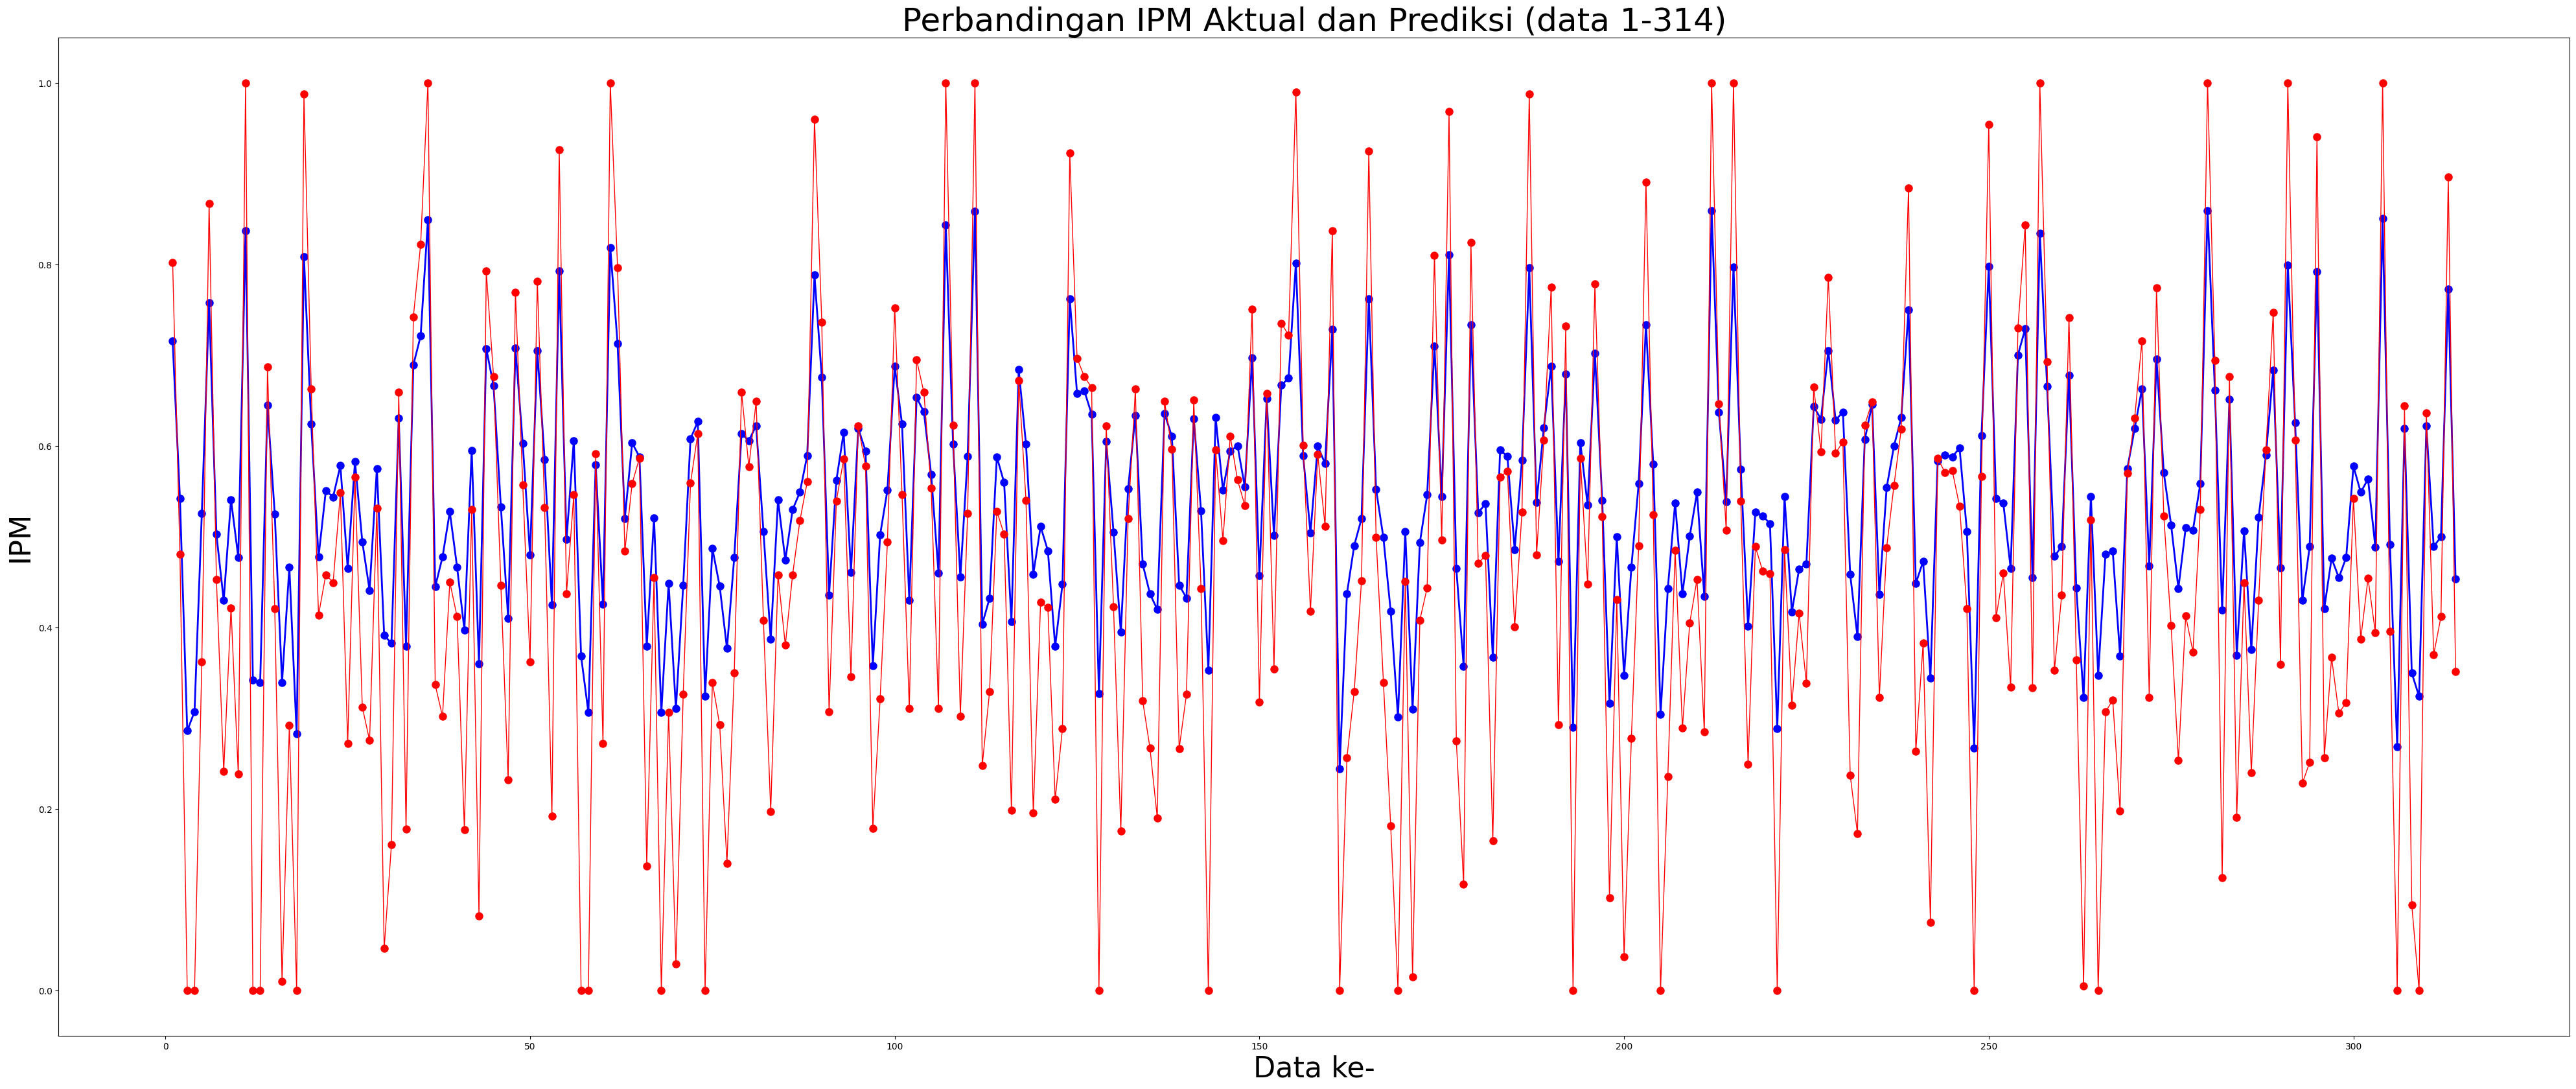

In [17]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[:314], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[:314], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('IPM', fontsize=32)
plt.show()

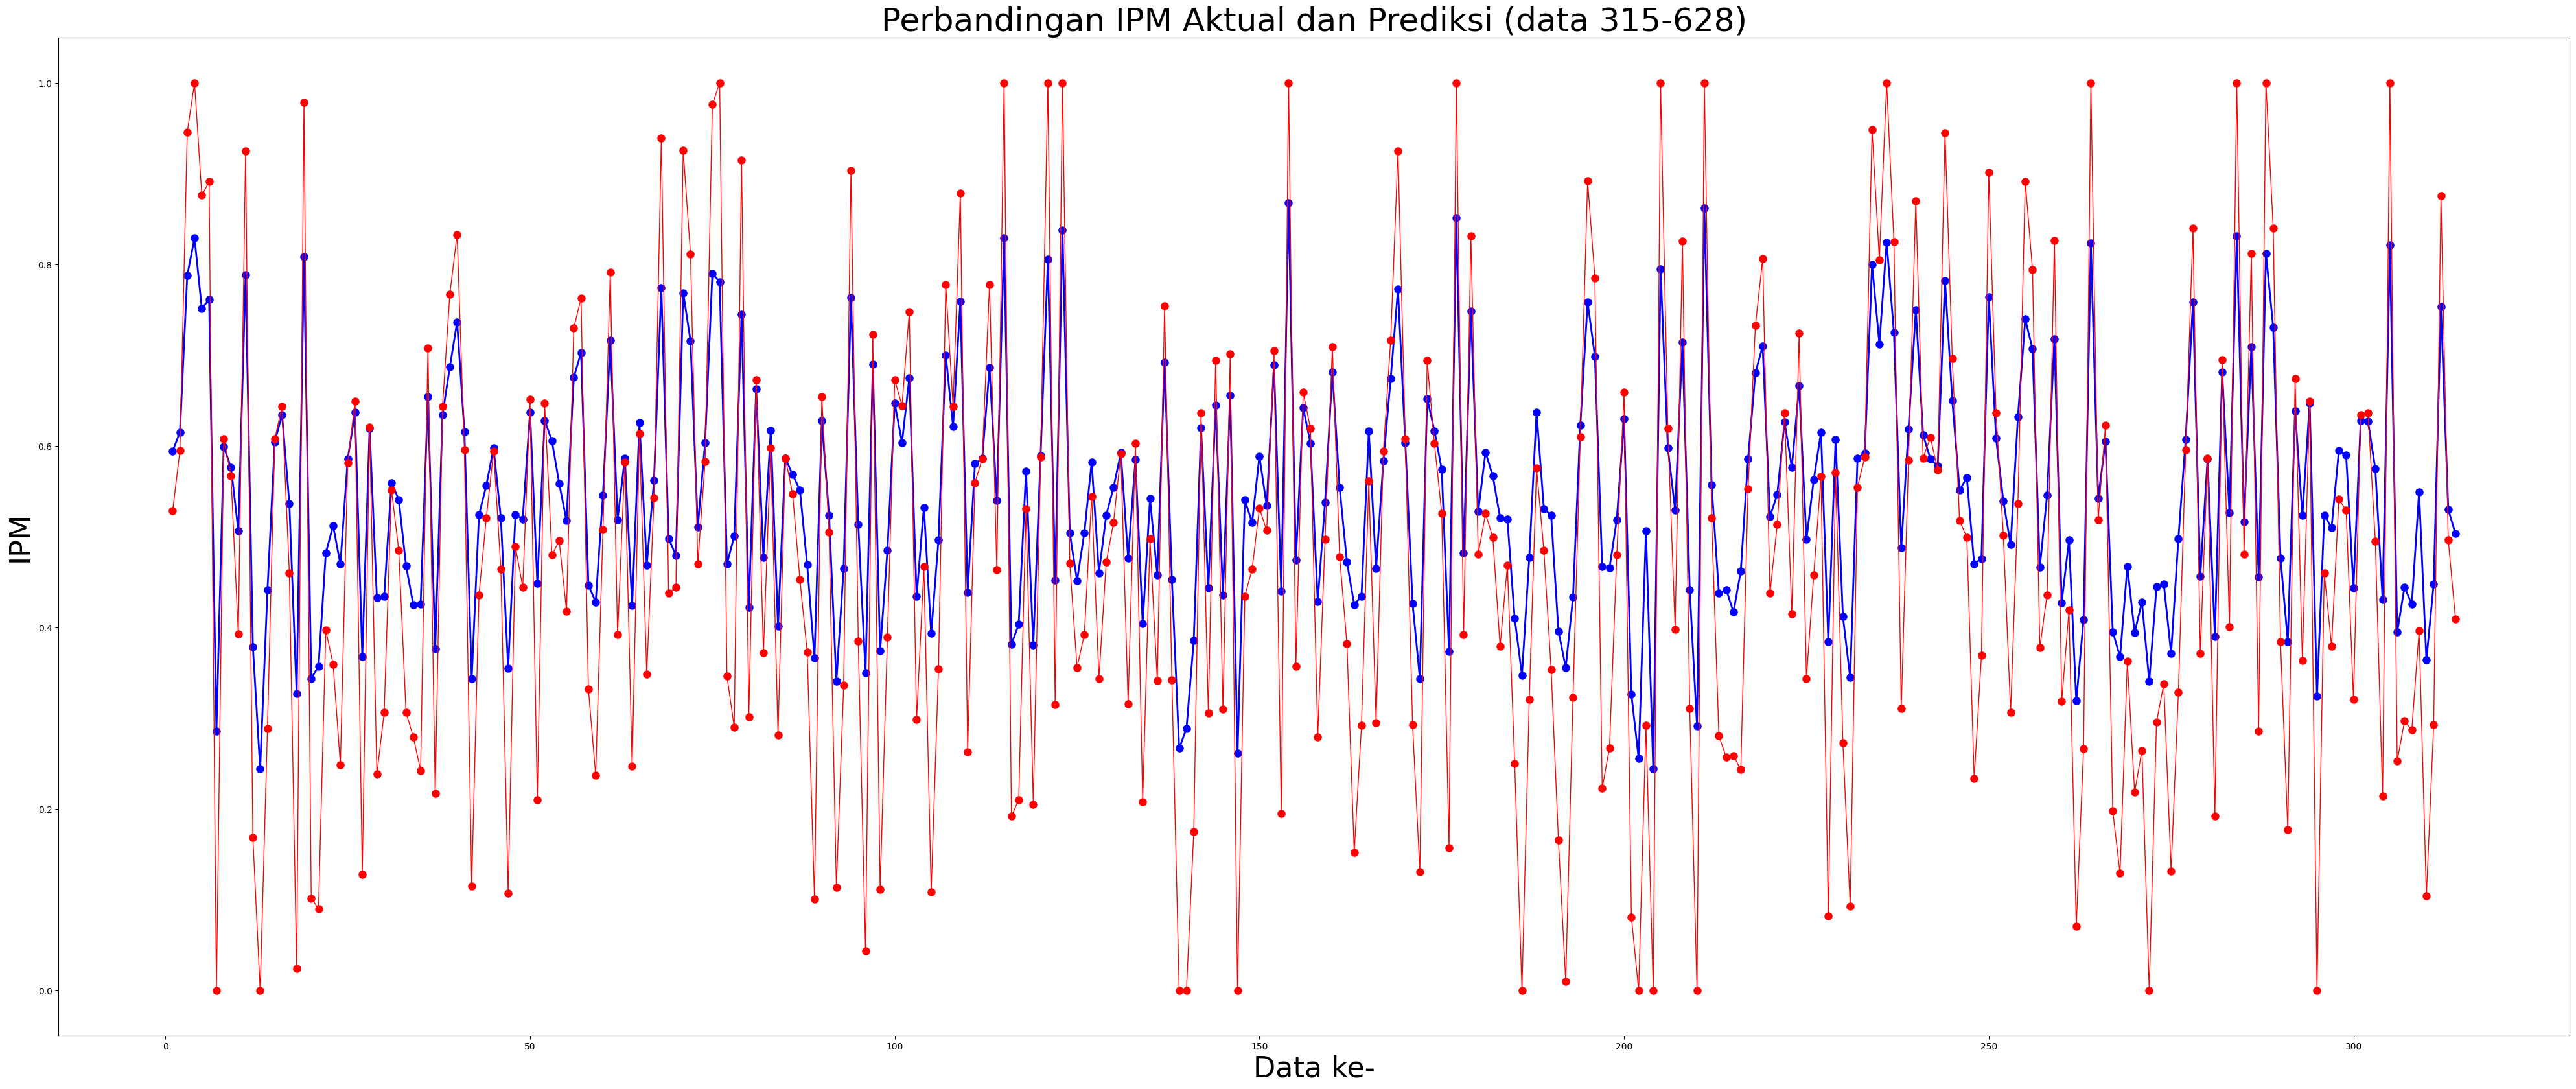

In [18]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, prediksi[314:], label="ipm prediksi", color='blue', linewidth=2, marker='o', markersize=8)
plt.plot(datake, y_test[314:], label="ipm aktual", color='red', linewidth=1, marker='o', markersize=8)
plt.title('Perbandingan IPM Aktual dan Prediksi (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('IPM', fontsize=32)
plt.show()

##### Visualisasi Error

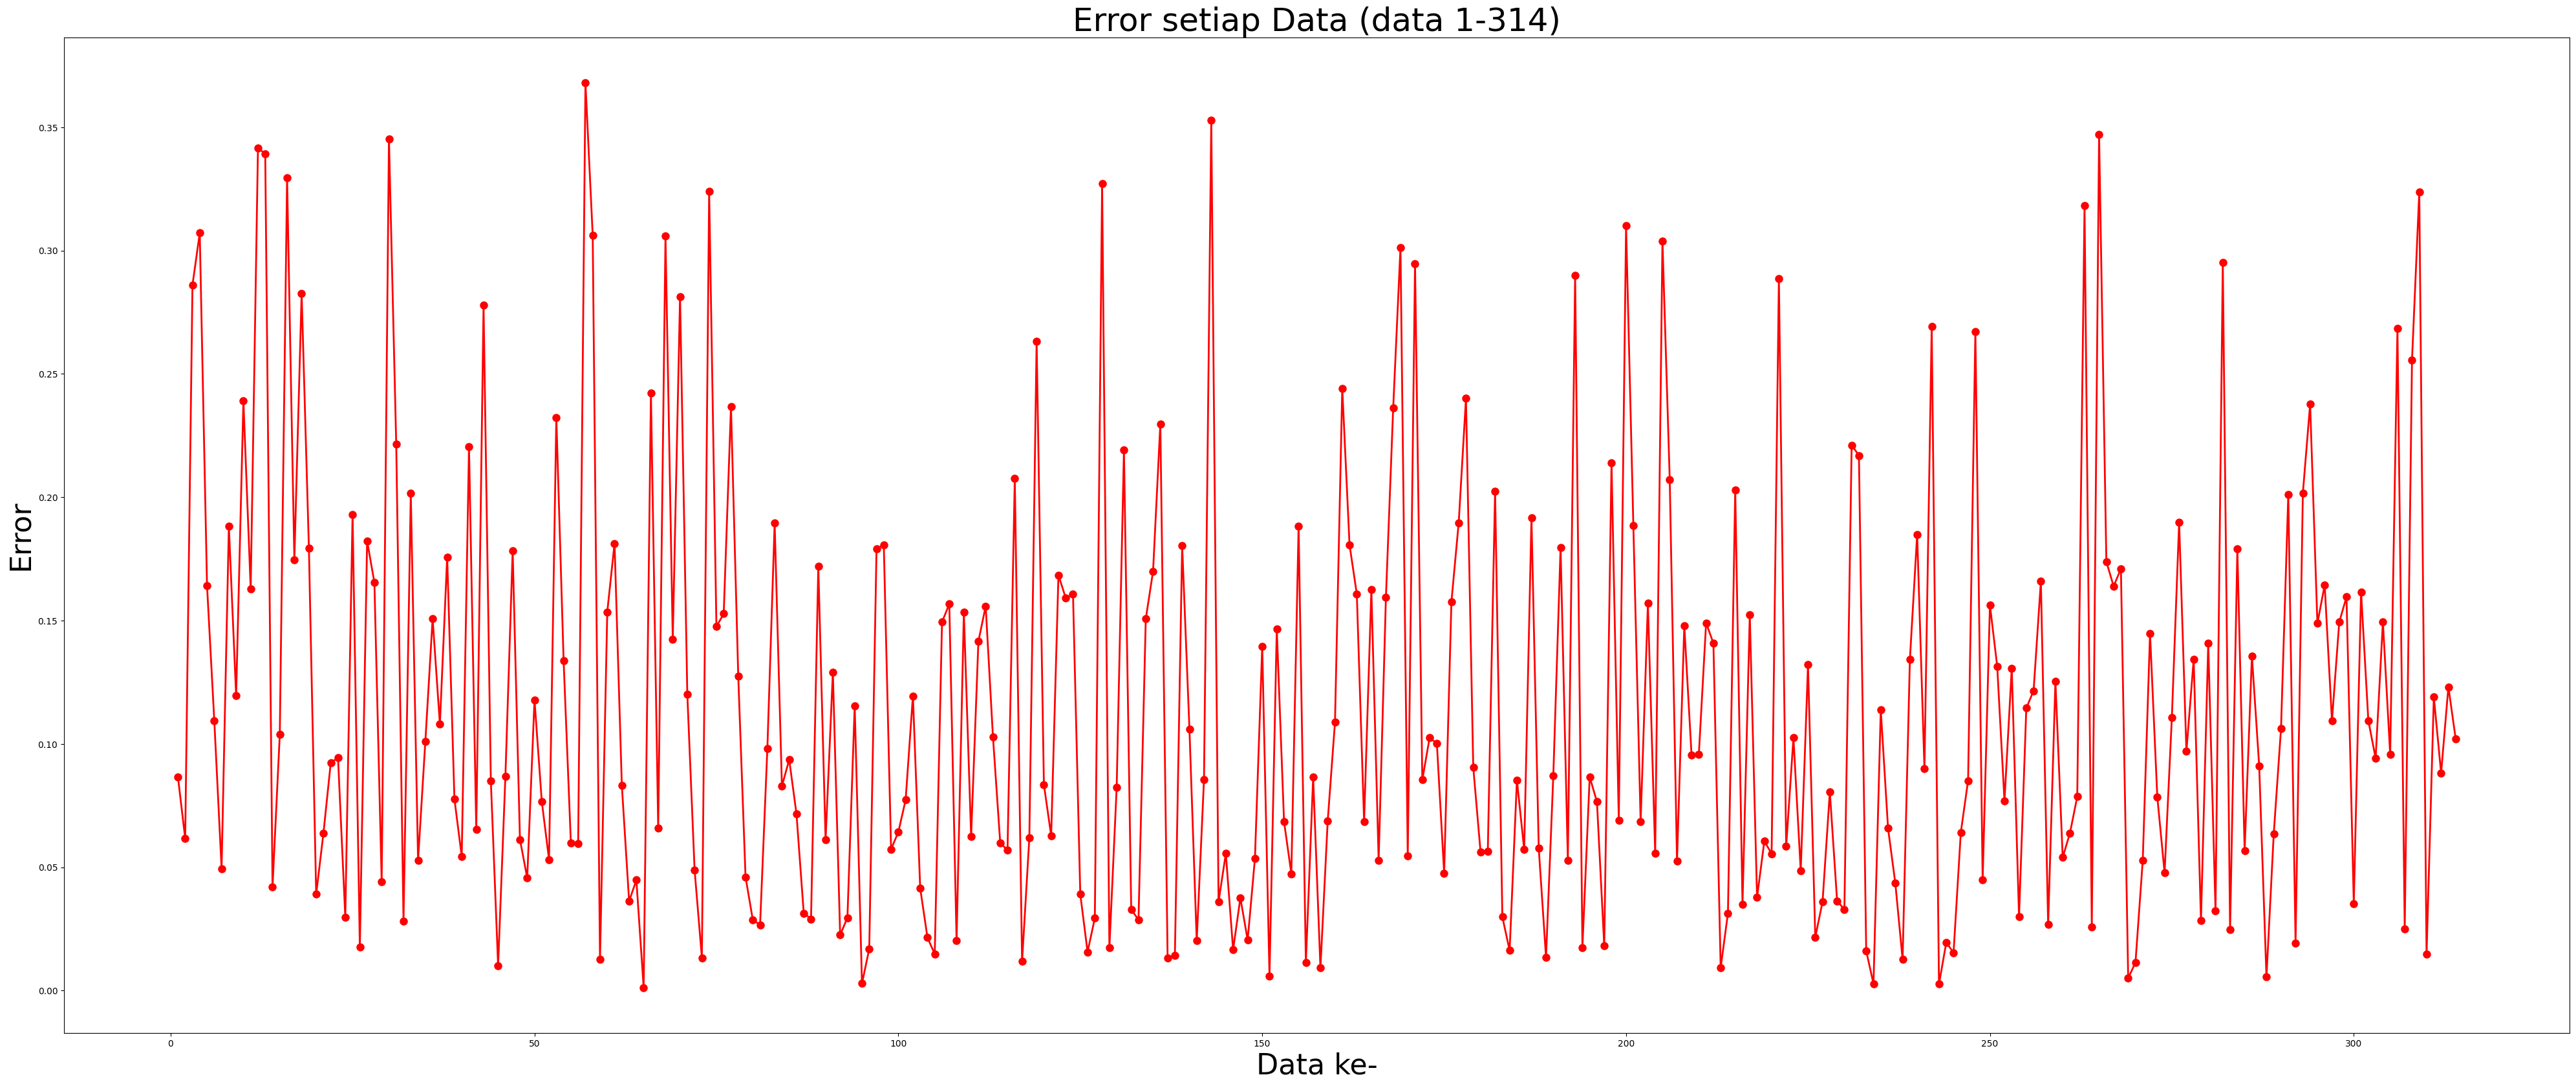

In [19]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[:314], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 1-314)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

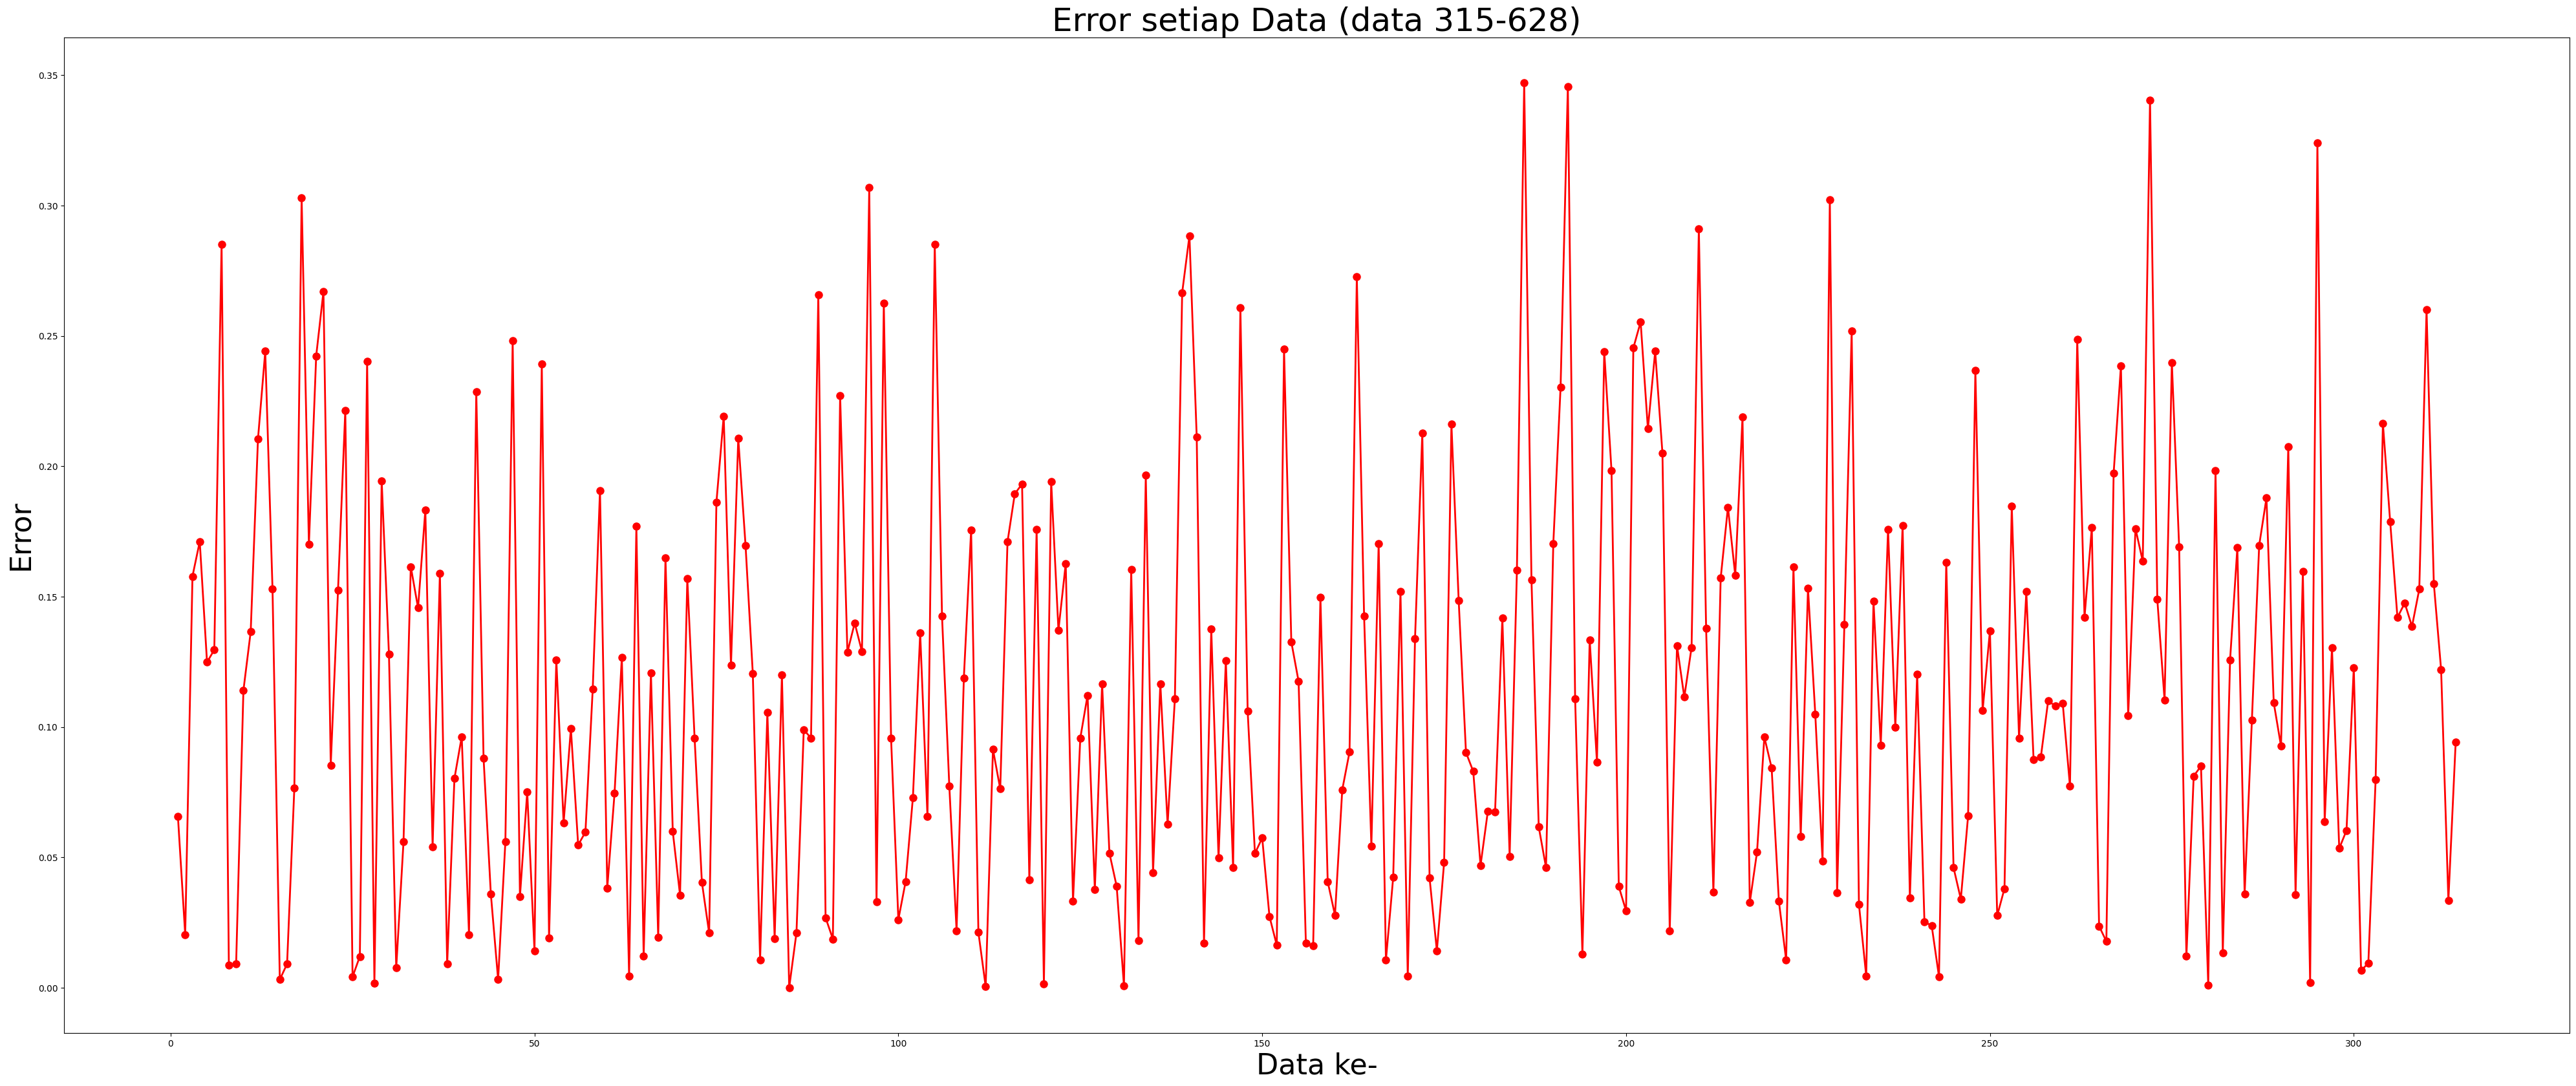

In [20]:
datake = list(range(1, int(len(y_test)/2) + 1))
plt.figure(figsize=(50, 20))
plt.plot(datake, error[314:], label="ipm prediksi", color='red', linewidth=2, marker='o', markersize=8)
plt.title('Error setiap Data (data 315-628)', fontsize=36)
plt.xlabel('Data ke-', fontsize=32)
plt.ylabel('Error', fontsize=32)
plt.show()

In [23]:
max_error = max(error)
min_error = min(error)
rerata_error = sum(error) / len(error)
print(f"Maksimal Error: {max_error}")
print(f"Minimal Error: {min_error}")
print(f"Rerata Error: {rerata_error}")

Maksimal Error: 0.3681318553186742
Minimal Error: 2.0032254721358278e-05
Rerata Error: 0.11520385124398877


In [22]:
for i in range(len(y_test)):
    print(f"Aktual: {y_test[i][0]} - Prediksi: {prediksi[i]}")

Aktual: 0.801908223534757 - Prediksi: 0.715225655097785
Aktual: 0.4802362562471605 - Prediksi: 0.541875714466078
Aktual: 0.0 - Prediksi: 0.28604708567072823
Aktual: 0.0 - Prediksi: 0.30713969666179547
Aktual: 0.3616537937301229 - Prediksi: 0.5258513098749555
Aktual: 0.8668786915038615 - Prediksi: 0.757532869365829
Aktual: 0.4529759200363465 - Prediksi: 0.5024668774924612
Aktual: 0.241253975465697 - Prediksi: 0.42949133660053096
Aktual: 0.4211721944570645 - Prediksi: 0.5407264001119829
Aktual: 0.238073602907769 - Prediksi: 0.477086437923444
Aktual: 1.0 - Prediksi: 0.8371487191691823
Aktual: 0.0 - Prediksi: 0.341704214352407
Aktual: 0.0 - Prediksi: 0.33912829695947744
Aktual: 0.686960472512494 - Prediksi: 0.6448845497899742
Aktual: 0.420717855520218 - Prediksi: 0.5246222338685839
Aktual: 0.009995456610631 - Prediksi: 0.3394096162376794
Aktual: 0.2916855974557015 - Prediksi: 0.46637888517244896
Aktual: 0.0 - Prediksi: 0.28264213211993594
Aktual: 0.987732848705134 - Prediksi: 0.80836978252